In [2]:
from pynq import PL
from pynq import MMIO
from pynq import Overlay
from pynq import allocate,buffer
import numpy as np
import matplotlib.pyplot as plt
from pynq import Overlay
#base = Overlay("base.bit")
cnn = Overlay("/home/xilinx/jupyter_notebooks/test/cnn.bit")


In [6]:
import time
cnn = Overlay("/home/xilinx/jupyter_notebooks/test/cnn.bit")
dma = cnn.axi_dma_0
num = 0
#加载网络参数，及测试图片
test_images = np.load("test_images.npy")
test_images = test_images.reshape(-1,28,28)
test_labels = np.load("test_labels.npy")
weights = np.load("weights.npz")
w = []
for v in weights:
    w.append(weights[v].reshape(-1))
wl = np.concatenate(w,0)
iuputbuff = allocate(shape=(400,), dtype=np.int32)
out_buffer = allocate(shape=(10,), dtype=np.int32)
iuputbuff[0] = 101

iuputbuff[1:] =  wl[:399]
dma.sendchannel.transfer(iuputbuff)
dma.sendchannel.wait()
end = 399
while(end + 400 < wl.size):
    iuputbuff[:] =  wl[end:end+400]
    dma.sendchannel.transfer(iuputbuff)
    dma.sendchannel.wait()
    end = end + 400
iuputbuff = allocate(shape=(wl.size-end,), dtype=np.int32)
iuputbuff[:] = wl[end:]
dma.sendchannel.transfer(iuputbuff)
dma.sendchannel.wait()
iuputbuff = allocate(shape=(test_images[0].size + 1,), dtype=np.int32)
out_buffer = allocate(shape=(10,), dtype=np.int32)
testImage = test_images[num].reshape(-1)
iuputbuff[0] = 301
iuputbuff[1:] =  testImage[:]
dma.sendchannel.transfer(iuputbuff)
dma.sendchannel.wait()
dma.recvchannel.transfer(out_buffer)
dma.recvchannel.wait()
print(np.argmax(out_buffer))
print(test_labels[0])
plt.subplot(111)
plt.imshow(test_images[num],cmap = 'gray')

7
7


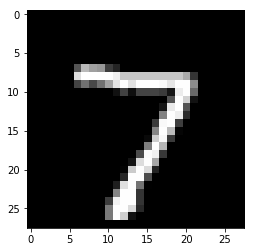

In [17]:
plt.subplot(111)
plt.imshow(test_images[0],cmap = 'gray')

In [21]:
weights = np.load("weights.npz")
print(weights["fn2"].shape)
print(weights["cov2"].reshape(-1))

(120, 84)
[ 0.15728049 -0.03336901  0.11023627 ..., -0.05930579 -0.00142765
 -0.02509099]


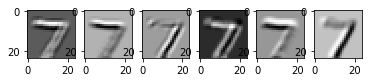

In [39]:
#help(signal.convolve2d)
 from scipy import signal
for i in range(6):
    covresult = signal.convolve2d(test_images[0]/255.0,cov28_28_5_5_6[:,:,0,i],mode="valid")
    covresult = covresult*255
    covresult = covresult.astype(int)
    plt.subplot(160 + i+1)
    plt.imshow(covresult,cmap = 'gray')

In [73]:
from pynq import buffer
dir(iuputbuff)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__del__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '

In [108]:
help(dma.sendchannel.transfer)

Help on method transfer in module pynq.lib.dma:

transfer(array) method of pynq.lib.dma._DMAChannel instance
    Transfer memory with the DMA
    
    Transfer must only be called when the channel is idle.
    
    Parameters
    ----------
    array : ContiguousArray
        An xlnk allocated array to be transferred



In [26]:
in_buffer?

In [10]:
out_buffer[:-1].reshape(12,12,-1)

PynqBuffer([[[      0,       0,       0, ...,       0,       0,       0],
             [      0,       0,       0, ...,       0,       0,       0],
             [      0,       0,       0, ...,       0,       0,       0],
             ..., 
             [      0,       0,       0, ...,       0,       0,       0],
             [      0,       0,       0, ...,       0,       0,       0],
             [      0,       0,       0, ...,       0,       0,       0]],

            [[      0,       0,       0, ...,       0,       0,       0],
             [      0,       0,       0, ...,       0,       0,       0],
             [      0,       0,       0, ...,       0,       0,       0],
             ..., 
             [      0,       0,       0, ...,       0,       0,       0],
             [      0,       0,       0, ...,       0,       0,       0],
             [      0,       0,       0, ...,       0,       0,       0]],

            [[      0,       0,       0, ...,   -5122,  -74778,  -4186

In [8]:
24*24*6

3456

In [4]:
tt = np.array([1,2])
tt[0:1]

array([1])